# Generate Ornstein-Uhlenbeck Process with Euler and Milstein Schemes

### Euler

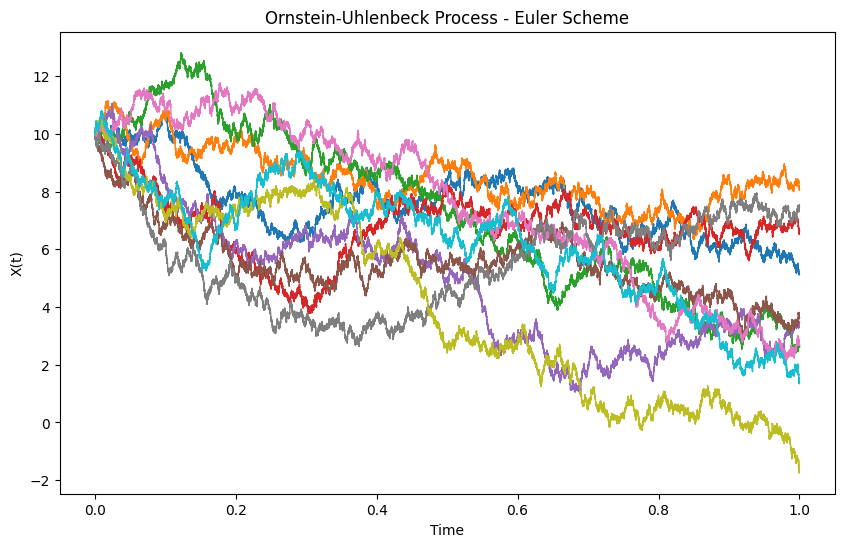

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler scheme for the OU process
def GeneratePaths_OU_Euler(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths=1):
    dt = T / float(NoOfSteps)
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    X[:, 0] = X0
    W = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    time = np.linspace(0, T, NoOfSteps + 1)
    
    for i in range(NoOfSteps):
        X[:, i+1] = X[:, i] + theta * (mu - X[:, i]) * dt + sigma * np.sqrt(dt) * W[:, i]
    
    paths = {"time": time, "X": X}
    return paths

# Parameters for the simulation
NoOfSteps = 100000
T = 1.0
X0 = 10
theta = 1.0
mu = 2.0
sigma = 4
NoOfPaths = 10

# Generate paths
paths_Euler = GeneratePaths_OU_Euler(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)

# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(NoOfPaths):
    plt.plot(paths_Euler["time"], paths_Euler["X"][i, :], lw=1)
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Ornstein-Uhlenbeck Process - Euler Scheme")
plt.show()


### Milstein

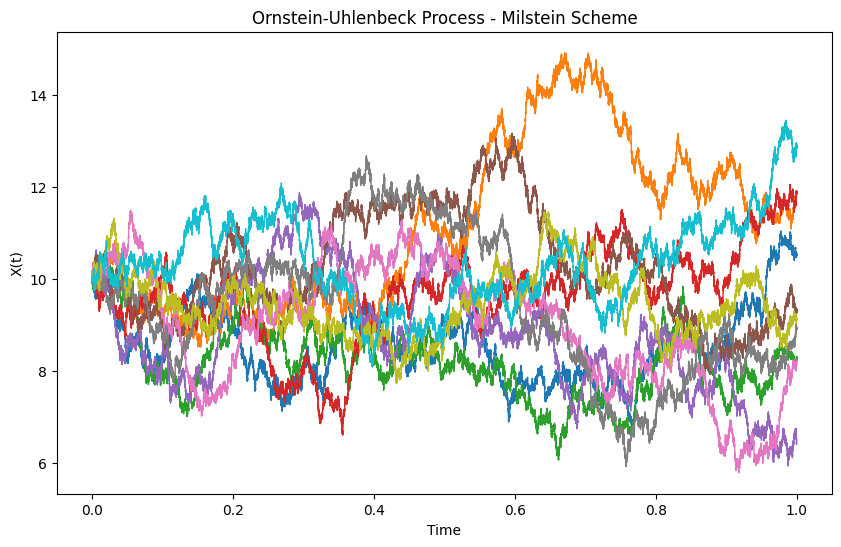

In [2]:
# Milstein scheme for the OU process
def GeneratePaths_OU_Milstein(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths=1):
    dt = T / float(NoOfSteps)
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    X[:, 0] = X0
    W = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    time = np.linspace(0, T, NoOfSteps + 1)
    
    for i in range(NoOfSteps):
        X[:, i+1] = X[:, i] + theta * (mu - X[:, i]) * dt + sigma * np.sqrt(dt) * W[:, i] \
                    + 0.5 * sigma * sigma * dt * (W[:, i] ** 2 - dt)
    
    paths = {"time": time, "X": X}
    return paths

# Generate paths
paths_Milstein = GeneratePaths_OU_Milstein(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)

# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(NoOfPaths):
    plt.plot(paths_Milstein["time"], paths_Milstein["X"][i, :], lw=1)
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Ornstein-Uhlenbeck Process - Milstein Scheme")
plt.show()


### Exact 

In [3]:

# Exact solution of the OU process
def GeneratePaths_OU_Exact(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths=1):
    dt = T / float(NoOfSteps)
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    X[:, 0] = X0
    time = np.linspace(0, T, NoOfSteps + 1)
    
    for i in range(NoOfSteps):
        t = i * dt
        dW = np.random.normal(0.0, np.sqrt(dt), [NoOfPaths])
        X[:, i+1] = X[:, i] * np.exp(-theta * dt) + mu * (1 - np.exp(-theta * dt)) + sigma * np.sqrt((1 - np.exp(-2 * theta * dt)) / (2 * theta)) * dW

    paths = {"time": time, "X": X}
    return paths

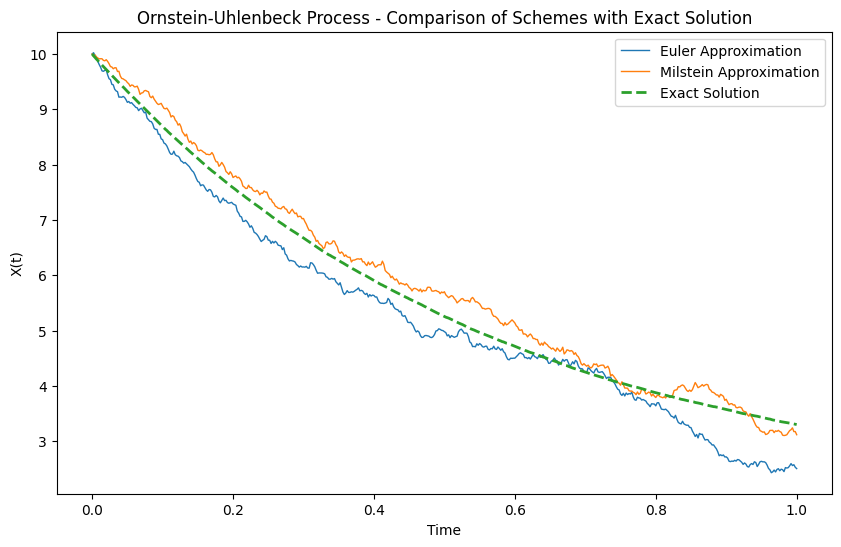

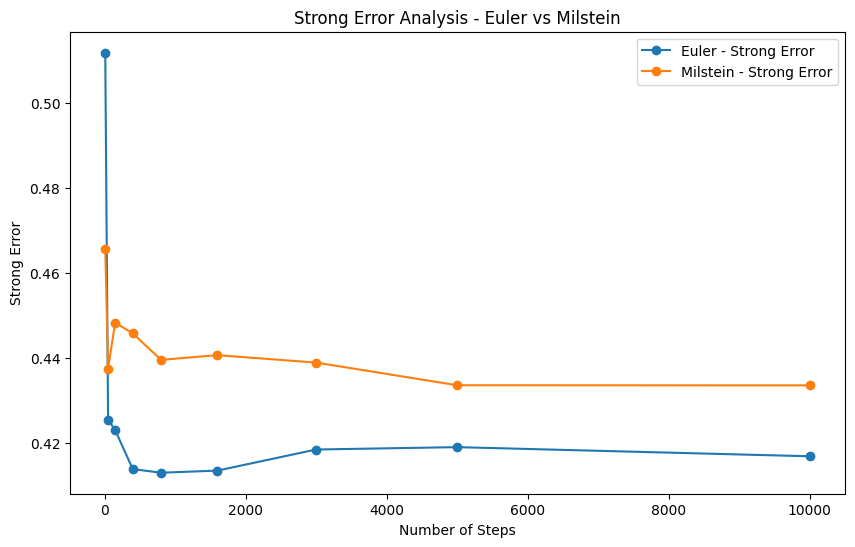

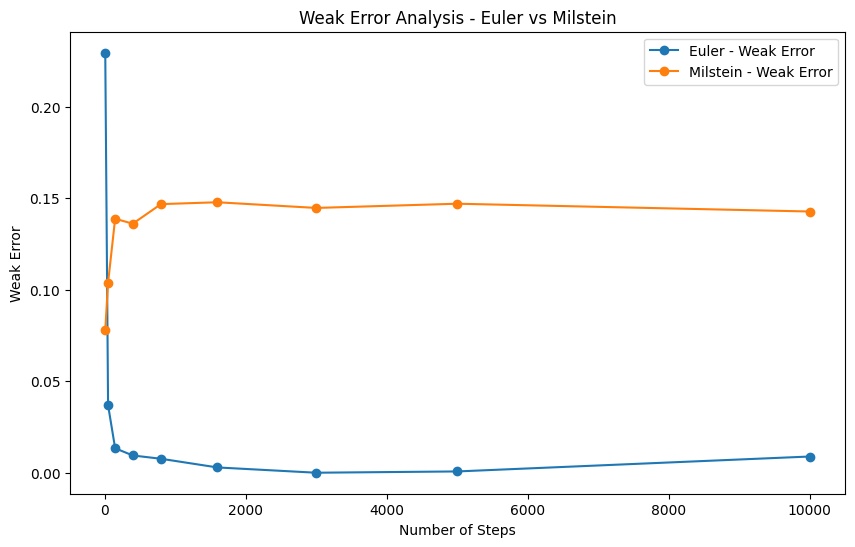

In [4]:

# Parameters for the simulation
T = 1.0
X0 = 10.0
theta = 1.8
mu = 2.0
sigma = 0.8
NoOfPaths = 50

# Generate paths for a single sample
NoOfSteps = 500
paths_Euler = GeneratePaths_OU_Euler(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
paths_Milstein = GeneratePaths_OU_Milstein(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
paths_Exact = GeneratePaths_OU_Exact(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)

# Plot 1 sample of Euler, Milstein, and Exact solutions
plt.figure(figsize=(10, 6))
plt.plot(paths_Euler["time"], paths_Euler["X"][0, :], label="Euler Approximation", lw=1)
plt.plot(paths_Milstein["time"], paths_Milstein["X"][0, :], label="Milstein Approximation", lw=1)
plt.plot(paths_Exact["time"], paths_Exact["X"][0, :], label="Exact Solution", lw=2, linestyle='--')
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Ornstein-Uhlenbeck Process - Comparison of Schemes with Exact Solution")
plt.legend()
plt.show()

# Compute strong and weak errors for both Euler and Milstein schemes
NofSteps_array = [10, 50, 150, 400, 800, 1600, 3000, 5000, 10000]
strong_errors_euler = []
strong_errors_milstein = []
weak_errors_euler = []
weak_errors_milstein = []

for NoOfSteps in NofSteps_array:
    # Generate multiple paths for error analysis
    NoOfPaths = 5000
    paths_Euler = GeneratePaths_OU_Euler(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    paths_Milstein = GeneratePaths_OU_Milstein(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    paths_Exact = GeneratePaths_OU_Exact(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    
    # Strong error (mean squared error between paths)
    strong_error_euler = np.mean((paths_Euler["X"][:, -1] - paths_Exact["X"][:, -1])**2)**0.5
    strong_error_milstein = np.mean((paths_Milstein["X"][:, -1] - paths_Exact["X"][:, -1])**2)**0.5
    strong_errors_euler.append(strong_error_euler)
    strong_errors_milstein.append(strong_error_milstein)
    
    # Weak error (absolute mean difference between paths' expected values)
    weak_error_euler = np.abs(np.mean(paths_Euler["X"][:, -1]) - np.mean(paths_Exact["X"][:, -1]))
    weak_error_milstein = np.abs(np.mean(paths_Milstein["X"][:, -1]) - np.mean(paths_Exact["X"][:, -1]))
    weak_errors_euler.append(weak_error_euler)
    weak_errors_milstein.append(weak_error_milstein)

# Plot strong and weak errors for both Euler and Milstein schemes
plt.figure(figsize=(10, 6))
plt.plot(NofSteps_array, strong_errors_euler, 'o-', label="Euler - Strong Error")
plt.plot(NofSteps_array, strong_errors_milstein, 'o-', label="Milstein - Strong Error")
plt.xlabel("Number of Steps")
plt.ylabel("Strong Error")
plt.title("Strong Error Analysis - Euler vs Milstein")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(NofSteps_array, weak_errors_euler, 'o-', label="Euler - Weak Error")
plt.plot(NofSteps_array, weak_errors_milstein, 'o-', label="Milstein - Weak Error")
plt.xlabel("Number of Steps")
plt.ylabel("Weak Error")
plt.title("Weak Error Analysis - Euler vs Milstein")
plt.legend()
plt.show()


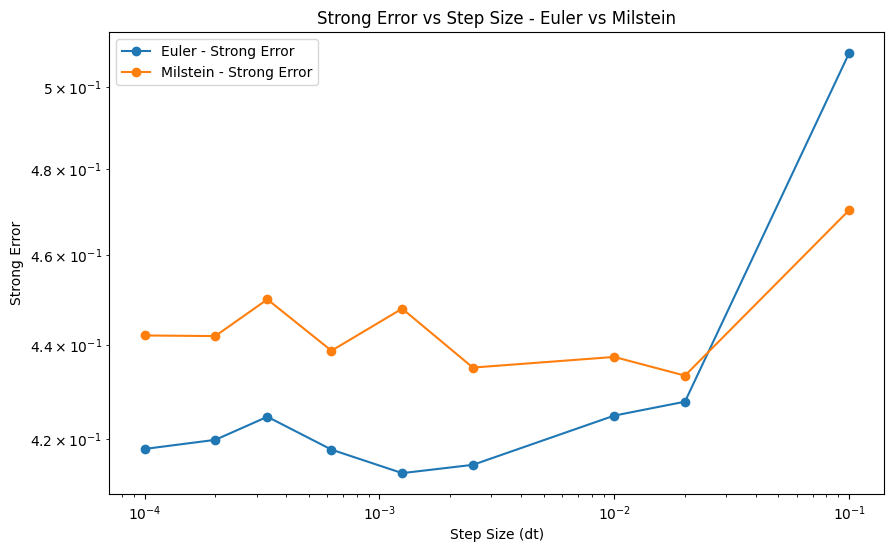

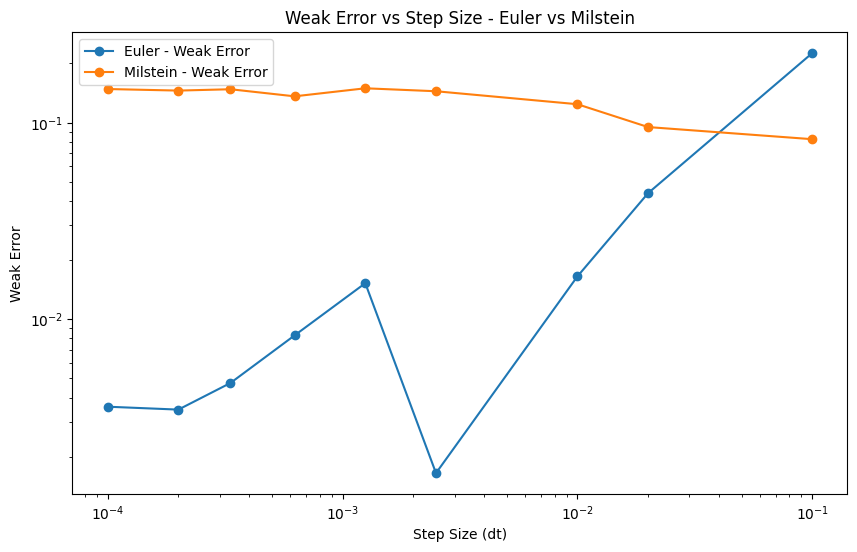

In [5]:
# Compute strong and weak errors for both Euler and Milstein schemes with varying step sizes
NofSteps_array = [10, 50, 100, 400, 800, 1600, 3000, 5000, 10000]
dt_array = [T / NoOfSteps for NoOfSteps in NofSteps_array]  # Step sizes for each simulation
strong_errors_euler = []
strong_errors_milstein = []
weak_errors_euler = []
weak_errors_milstein = []

for NoOfSteps in NofSteps_array:
    # Generate multiple paths for error analysis
    NoOfPaths = 5000
    paths_Euler = GeneratePaths_OU_Euler(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    paths_Milstein = GeneratePaths_OU_Milstein(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    paths_Exact = GeneratePaths_OU_Exact(NoOfSteps, T, X0, theta, mu, sigma, NoOfPaths)
    
    # Strong error (mean squared error between paths)
    strong_error_euler = np.mean((paths_Euler["X"][:, -1] - paths_Exact["X"][:, -1])**2)**0.5
    strong_error_milstein = np.mean((paths_Milstein["X"][:, -1] - paths_Exact["X"][:, -1])**2)**0.5
    strong_errors_euler.append(strong_error_euler)
    strong_errors_milstein.append(strong_error_milstein)
    
    # Weak error (absolute mean difference between paths' expected values)
    weak_error_euler = np.abs(np.mean(paths_Euler["X"][:, -1]) - np.mean(paths_Exact["X"][:, -1]))
    weak_error_milstein = np.abs(np.mean(paths_Milstein["X"][:, -1]) - np.mean(paths_Exact["X"][:, -1]))
    weak_errors_euler.append(weak_error_euler)
    weak_errors_milstein.append(weak_error_milstein)

# Plot strong and weak errors against the step size
plt.figure(figsize=(10, 6))
plt.plot(dt_array, strong_errors_euler, 'o-', label="Euler - Strong Error")
plt.plot(dt_array, strong_errors_milstein, 'o-', label="Milstein - Strong Error")
plt.xlabel("Step Size (dt)")
plt.ylabel("Strong Error")
plt.title("Strong Error vs Step Size - Euler vs Milstein")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dt_array, weak_errors_euler, 'o-', label="Euler - Weak Error")
plt.plot(dt_array, weak_errors_milstein, 'o-', label="Milstein - Weak Error")
plt.xlabel("Step Size (dt)")
plt.ylabel("Weak Error")
plt.title("Weak Error vs Step Size - Euler vs Milstein")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()